In [1]:
%load_ext autoreload
%autoreload 1

In [29]:
import sys
sys.path.append('src')
from poisson_disk import PoissonDiskSampler
%aimport settings
import settings
%aimport cnn_utils
import cnn_utils

import numpy as np
import cv2
import matplotlib
import matplotlib.pylab as plt
sys.path.append(settings.CAFFE_PYTHON_PATH)
import caffe
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Piosson Disk Sampling

samples size:  43


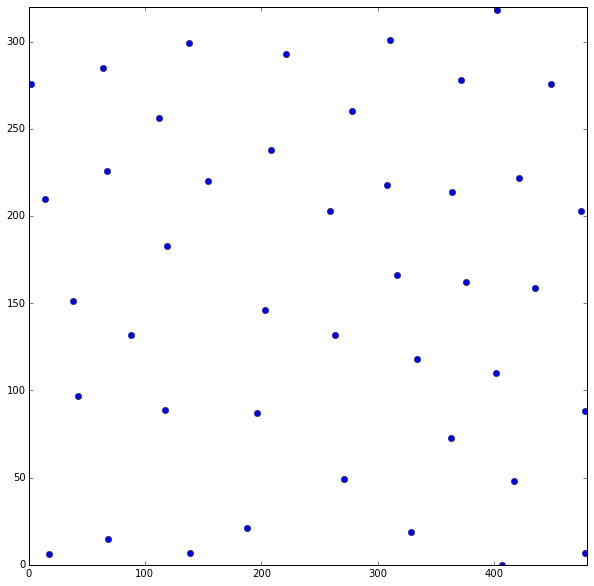

In [4]:
width = 480
height = 320
radius = 50
pds = PoissonDiskSampler(width, height, radius)
samples = pds.get_sample()
print 'samples size: ', len(samples)
xs = [int(s[0]) for s in samples]
ys = [int(s[1]) for s in samples]
plt.plot(xs, ys, 'o')
plt.xlim([0,width])
plt.ylim([0,height])
plt.show()

# Working with Caffe's Net Object

In [30]:
dh = cnn_utils.DeepHelper(net_layers=['conv1', 'conv2'], interpolation=cv2.INTER_NEAREST)

In [6]:
img = caffe.io.load_image('/home/ipl/datasets/CUB-200-2011/CUB_200_2011/CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0062_795434.jpg')

In [7]:
img.shape

(299, 400, 3)

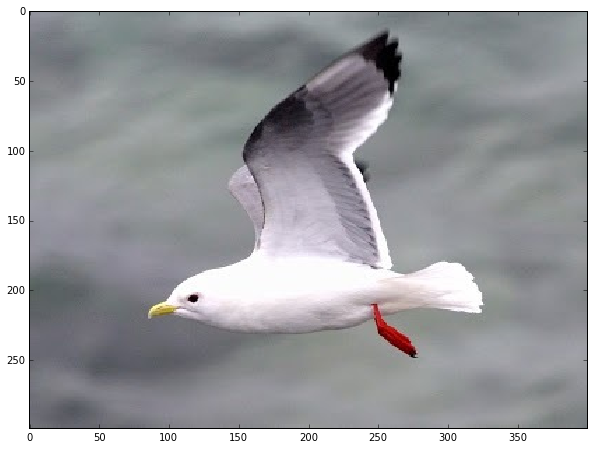

In [8]:
plt.imshow(img)

In [31]:
dh.init_with_image(img)

In [32]:
dh.feats['conv1'].shape

(299, 400, 96)

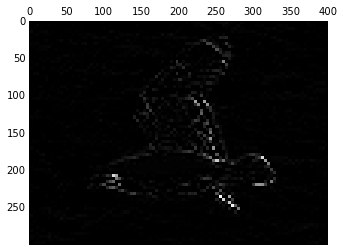

In [34]:
plt.matshow(dh.feats['conv1'][:, :, 0])

In [35]:
dh.ffeats.shape

(299, 400, 352)